In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# Ising Model - Magnetic field study

## Load data

In [2]:
# load field study data
df = pd.read_csv("studies/batch_run_field.csv")

# transform observables
df["magnetization"]= df["magnetization"]/(30*30)
df["magnetization_abs"] = np.abs(df["magnetization"])

# select the variables relative to the study
df = df[["RunId","iteration","Step", "beta","magnetic_field","energy", "magnetization", "magnetization_abs"]]

# calculate averages per parameter combo
df = df.groupby(["beta", "magnetic_field", "Step"]).mean().reset_index()

df.head(2)

,beta,magnetic_field,Step,RunId,iteration,energy,magnetization,magnetization_abs
0,0.1,-1,0,1336.5,49.5,-0.366022,0.318956,0.318956
1,0.1,-1,1,1336.5,49.5,-0.402267,0.222889,0.222889


## Parameter evaluation

In [3]:
# betas in the study - use coolwarm colormap
betas = sorted(set(df.beta.value_counts().index))
normalize = plt.Normalize(min(betas), max(betas))
colormap = plt.cm.coolwarm.reversed()
colors = colormap(normalize(betas))

# color scale
sm = cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])

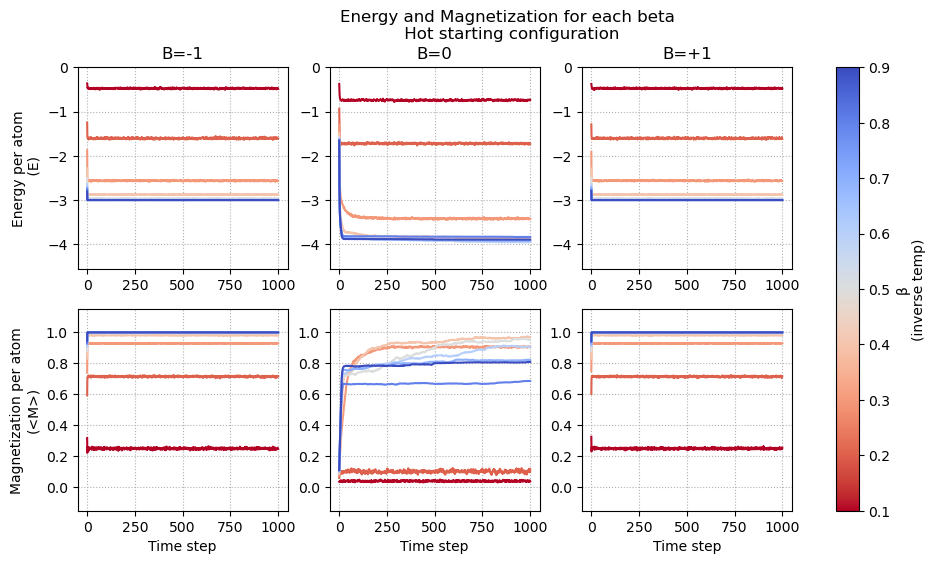

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(1.8*6.4, 1.2*4.8))

for beta, color in zip(betas, colors): # one line per temperature
    
    sm.to_rgba(beta)

    df_plot = df[df["beta"] == beta] 

    # sort accroding to simulation step (time)
    df_plot_0 = df_plot[df_plot["magnetic_field"] == 0]
    df_plot_0 = df_plot_0.sort_values(by="Step", ascending=True)
    
    df_plot_1 = df_plot[df_plot["magnetic_field"] == 1]
    df_plot_1 = df_plot_1.sort_values(by="Step", ascending=True)

    df_plot_m1 = df_plot[df_plot["magnetic_field"] == -1]
    df_plot_m1 = df_plot_m1.sort_values(by="Step", ascending=True)
    
    axs[0][0].plot(df_plot_m1["Step"], df_plot_m1["energy"], label=f'{beta:.2f}', color=color)
    axs[0][1].plot(df_plot_0["Step"], df_plot_0["energy"], label=f'{beta:.2f}', color=color)
    axs[0][2].plot(df_plot_1["Step"], df_plot_1["energy"], label=f'{beta:.2f}', color=color)

    axs[1][0].plot(df_plot_m1["Step"], df_plot_m1["magnetization_abs"], label=f'{beta:.2f}', color=color)
    axs[1][1].plot(df_plot_0["Step"], df_plot_0["magnetization_abs"], label=f'{beta:.2f}', color=color)
    axs[1][2].plot(df_plot_1["Step"], df_plot_1["magnetization_abs"], label=f'{beta:.2f}', color=color)

# set betas colorbar
fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', label='β\n(inverse temp)')

# set titles, labels, grid lines, etc.
fig.suptitle("Energy and Magnetization for each beta \n Hot starting configuration")
axs[0][0].set_title(f"B=-1")
axs[0][1].set_title(f"B=0")
axs[0][2].set_title(f"B=+1")

axs[0][0].set_ylabel("Energy per atom\n (E)")
axs[1][0].set_ylabel("Magnetization per atom\n(<M>)")
for ax in axs[1]: ax.set_xlabel("Time step")

for ax in axs.flatten(): ax.grid(ls=":")

for ax in axs[0]: ax.set_ylim(-4.55, 0.0)
for ax in axs[1]: ax.set_ylim(-0.15, 1.15)

fig.savefig("plots/field_study.png", dpi=300)

# Voting Model

In [5]:
df = pd.read_csv("studies/batch_run_voting.csv")

# transform observables
df["magnetization"]= df["magnetization"]/(30*30)
df["magnetization_abs"] = np.abs(df["magnetization"])

# select the variables relative to the study
df = df[["RunId","iteration","Step", "prob","algo", "energy", "magnetization", "magnetization_abs"]]

# calculate averages per parameter combo
df = df.groupby(["prob", "algo", "Step"]).mean().reset_index()

df.head(2)

,prob,algo,Step,RunId,iteration,energy,magnetization,magnetization_abs
0,0.1,majority,0,891.0,49.5,-2.219467,-0.613489,0.613489
1,0.1,majority,1,891.0,49.5,-2.468711,-0.755778,0.755778


In [6]:
# probs in the study - use coolwarm colormap
probs = sorted(set(df.prob.value_counts().index))
normalize = plt.Normalize(min(probs), max(probs))
colormap = plt.cm.coolwarm
colors = colormap(normalize(probs))

# color scale
sm = cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])

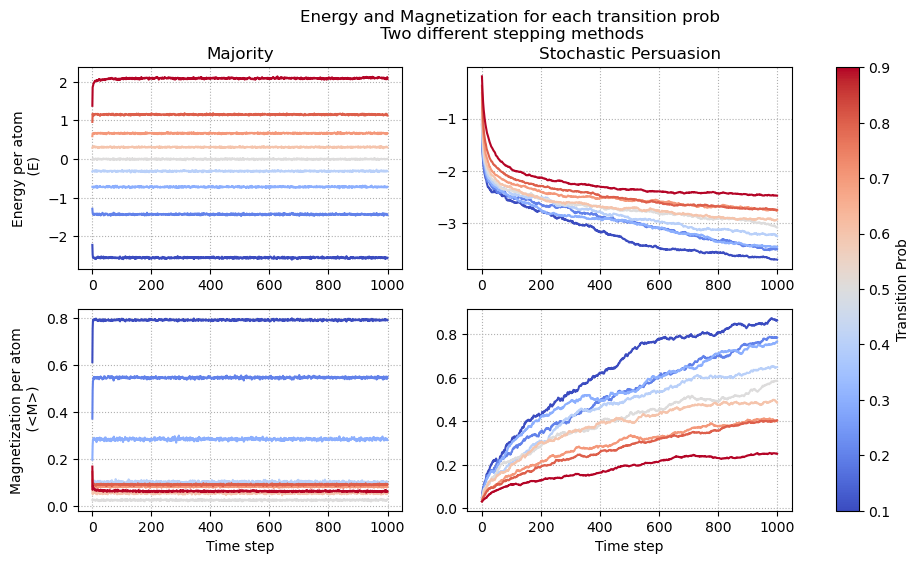

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(1.8*6.4, 1.2*4.8))

for prob, color in zip(probs, colors): # one line per temperature
    
    sm.to_rgba(prob)

    df_plot = df[df["prob"] == prob] 

    df_maj = df_plot[df_plot["algo"] == "majority"]
    df_maj.sort_values(by="Step", ascending=True)

    df_pers = df_plot[df_plot["algo"] == "stochastic_persuasion"]
    df_pers.sort_values(by="Step", ascending=True)


    axs[0][0].plot(df_maj["Step"], df_maj["energy"], label=f'{prob:.2f}', color=color)
    axs[1][0].plot(df_maj["Step"], df_maj["magnetization_abs"], label=f'{prob:.2f}', color=color)

    axs[0][1].plot(df_pers["Step"], df_pers["energy"], label=f'{prob:.2f}', color=color)
    axs[1][1].plot(df_pers["Step"], df_pers["magnetization_abs"], label=f'{prob:.2f}', color=color)

fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', label='Transition Prob')

# set titles, labels, grid lines, etc.
fig.suptitle("Energy and Magnetization for each transition prob\n Two different stepping methods")
axs[0][0].set_title("Majority")
axs[0][1].set_title("Stochastic Persuasion")

axs[0][0].set_ylabel("Energy per atom\n (E)")
axs[1][0].set_ylabel("Magnetization per atom\n (<M>)")

for ax in axs[1]: ax.set_xlabel("Time step")
for ax in axs.flatten(): ax.grid(ls=':')

fig.savefig("plots/voting_study.png", dpi=300)